In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd

import json
import glob
import os
import re

In [2]:
base = "../exp/"
paths = glob.glob(base + "compression_par/*.json")
data = [json.load(open(path)) for path in paths]

In [3]:
runs = pd.DataFrame.from_records(data)

In [18]:
runs['merge'] /= 1000

Text(0, 0.5, 'Running time [s]')

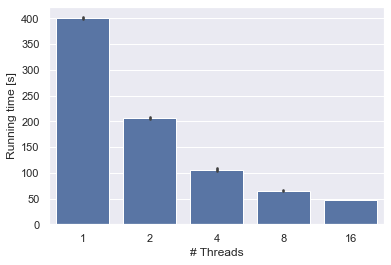

In [29]:
g = sns.barplot(data=runs, x='num_threads', y='merge', hue='program') 
g.legend_.remove()
g.set_xlabel('# Threads')
g.set_ylabel('Running time [s]')
# g.set_xscale('log')
# g.xaxis.set_major_locator(mpl.ticker.LogLocator(base=2,numticks=6))
# g.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda val, pos: f"{int(val)}"))

In [32]:
baseline = runs.loc[lambda x: x['num_threads'] == 1]['merge'].mean()
runs['speedup'] = baseline / runs['merge']
runs['effectiveness'] = runs['speedup'] / runs['num_threads']

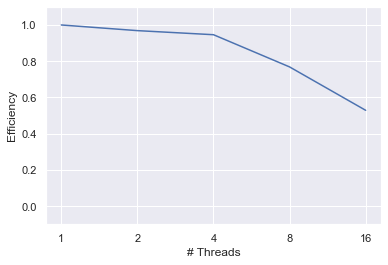

In [38]:
g = sns.lineplot(data=runs, x='num_threads', y='effectiveness', ci=None) 
g.set(ylim=(-0.1, 1.1))
g.set_xlabel('# Threads')
g.set_ylabel('Efficiency')
g.set_xscale('log')
g.xaxis.set_major_locator(mpl.ticker.LogLocator(base=2,numticks=6))
g.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda val, pos: f"{int(val)}"))